## Clustering with polygons
### Dataset Aragon

This notebook executes ClusterApplication to create a clusters shapefile from the data contained in the specified dataset.

This dataset contains polygonal geometries.

In [1]:
%matplotlib inline

import subprocess
import matplotlib.pyplot as plt
import shapefile
import numpy as np

### Execution 1

** Algorithm: ** K-Means (k = 5)

** Distance: ** Hausdorff

** Results: ** five clusters are generated, all having a similar amount of space assigned. This is because K-Means tends to create groups with similar sizes. This is ok in applications like this one where we want to partition a space homogeneously populated.

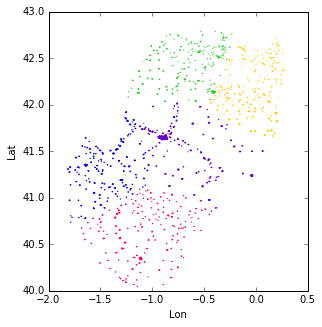

In [9]:
subprocess.call(
    ['java', '-jar', 'application.jar', 'aragon', 'Hausdorff', 'KMeans', '5'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#0000FF','#33CC33','#FFCC00','#FF0066','#6600CC']

plt.figure(figsize=(5, 5), dpi=100)

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.subplots_adjust(left = 0.18)
plt.show()

### Execution 2

** Algorithm: ** K-Means++ (k = 5)

** Distance: ** Hausdorff

** Results: ** by using K-Means++ we try to separate the initial centroids to improve the results of the algorithm, because in some executions K-Means may produce bad results due to two centroids being initialized very near.

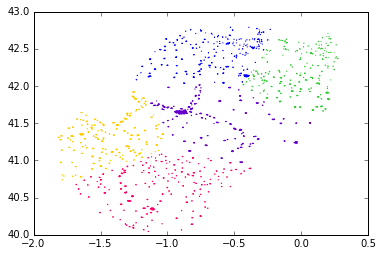

In [5]:
subprocess.call(
    ['java', '-jar', 'application.jar', 'aragon', 'Hausdorff', 'KMeans++', '5'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#0000FF','#33CC33','#FFCC00','#FF0066','#6600CC']

plt.figure(figsize=(5, 5), dpi=100)

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
     
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.subplots_adjust(left = 0.18)
plt.show()

### Conclusions
For a problem like this, consisting in distributing all data in k groups in an equal amount of space, K-Means is the way to go.

### Cleanup

In [17]:
import os, fnmatch
for root, dirs, files in os.walk('.', topdown=False):
    for pattern in ['*.dbf','*.fix','*.prj','*.shp','*.shx']:
        for name in fnmatch.filter(files, pattern):
            os.remove(name)